# Nine, simplified fifteen

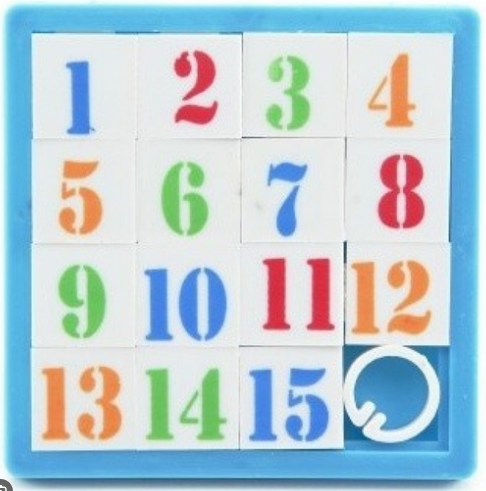

Initial and final state

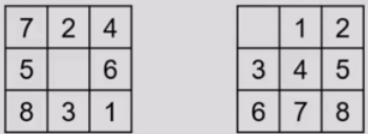

# Task 
- You have solved the State class from the previous problem
- Solve the problems using breadth-first search
- Solve the problem using depth-first search
- Implement depth-first search with constraints - DLS algorithm
- Try different maximum depths and observe the number of nodes generated.

You need to add code to the places marked **# !!! todo**

In [1]:
import copy

In [2]:
class State:
    """ 
    
    """

    generated = 0
    
    def __init__(self, left, right):                               
        # !!! todo
        pass
        
    def expand(self, action):
        # !!! todo             
        pass               
        

    def __eq__(self, other):  
        # !!! todo    
        pass

In [3]:
class Node:
    """
        Node for searching
        
        parent - reference to the parent node
        state - object State
        action - the action that led to this node
        depth - tree depth
    """

    def __init__(self, parent=None, state=None, action=None, depth=0):
        # !!! todo
        self.parent = parent
        self.state = state
        self.action = action
        self.depth = depth
        
        def succesors_impl(actions):
            succ = []
            for act in actions:
                next_state = self.state.expand(act)
                if next_state:
                    State.generated += 1
                    succ.append(Node(parent=self, state=next_state, action=act, depth=self.depth + 1))
            return succ
        
        self.succesors = succesors_impl
        pass

    def __eq__(self, other):
        # !!! todo
        if isinstance(other, Node):
            return self.state == other.state
        return False
        pass

    def path(self):
        # !!! todo
        current_node = self
        path_list = []
        while current_node.parent is not None:
            path_list.append(current_node.action)
            current_node = current_node.parent
        return path_list[::-1]
        
        pass

In [4]:
class Problem:
    """
        Main class
        
        fringe  - a list of nodes to scan, initially populated with the initial state
        goal    - goal state (we assume there is one)
        actions - list of possible actions        
    """

    def __init__(self, initial_state, goal, actions):
        self.fringe = []
        self.fringe.append(Node(parent=None, state=initial_state, action=None, depth=0))
        self.goal = goal
        self.actions = actions   
        global generated
        generated = 0

    def goal_test(self, state):
        if self.goal == state:
            return True
        else:
            return False

    def select_from(self, fringe, strategy, max_depth=5):
        if strategy=="BFS":
            return fringe.pop(0)
        elif strategy=="DFS":
            return fringe.pop(-1)
        elif strategy=="DLS":            
            # !!! todo
            while fringe:
                node = fringe.pop(-1)
                if node.depth <= max_depth:
                    return node
            return None
        else:
            return fringe.pop(0)
            

    def tree_search(self, strategy, max_depth=5):
        while True:
            if len(self.fringe) == 0:
                return None
                        
            node = self.select_from(self.fringe, strategy, max_depth)

            if node is None: 
                return None
                        
            if self.goal_test(node.state):
                return node
            
            self.fringe.extend(node.succesors(self.actions))

    def graph_search(self, strategy, max_depth=5):
        
        explored = []
        while True:
            if len(self.fringe) == 0:
                return None
            
            node = self.select_from(self.fringe, strategy, max_depth)
            
            if node is None: 
                return None
                        
            if self.goal_test(node.state):
                return node
            
            explored.append(node)
            
            succesors = node.succesors(self.actions)

            for succesor in succesors:
                if (succesor not in explored) and (succesor not in self.fringe):
                    self.fringe.append(succesor)

# BFS
First, let's try a simple initial condition. 

The breadth search should end soon and find the optimal solution.

In [5]:
problem = Problem(initial_state=State([[1,0,2],[3,4,5],[6,7,8]], 0, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd'],
                )

solution = problem.graph_search(strategy='BFS')

print (f"Number of states searched is {State.generated}.")
if solution is not None:
    print (solution.path())
else:
    print ("The problem has no solution.")    

TypeError: State.__init__() takes 3 positional arguments but 4 were given

# BFS with harder initial state
We'll try a slightly harder initial condition, but we'll see the result.

In [ ]:
problem2 = Problem(initial_state=State([[1,2,0],[3,4,5],[6,7,8]], 0, 2),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd'],
                )

solution = problem2.graph_search(strategy='BFS')

print (f"Number of states searched is {State.generated}.")
if solution is not None:
    print (solution.path())    
else:
    print ("The problem has no solution.")

# DFS
The initial situation is very complicated. If we search for it using BFS, it will take a lot of time.

Run the algorithm, but when you get tired of it, terminate the run.

In [ ]:
problem3 = Problem(initial_state=State([[7,2,4],[5,0,6],[8,3,1]], 1, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd'],
                )

solution = problem3.graph_search(strategy='BFS')
print (f"Number of states searched is {State.generated}.")
if solution is not None:
    print (solution.path())
else:
    print ("The problem has no solution.")

# Task 
Implement depth-first search with constraints - DLS algorithm

Try different maximum depths and observe the number of nodes generated.

In [ ]:
problem4 = Problem(initial_state=State([[7,2,4],[5,0,6],[8,3,1]], 1, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd'],
                )

solution = problem4.graph_search(strategy='DLS', max_depth=18)

print (f"Number of states searched is {State.generated}.")
if solution is not None:
    print (solution.path())
    
else:
    print ("The problem has no solution.")